In [248]:
%config InlineBackend.figure_format = 'retina' 

from SLens import analyser,gnfwSersic

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

Arc = [2.1,1,.39,1e-4]

def fplot(position):
    arc = position/10
    fig,ax = plt.subplots(1,2,figsize=(8,4))
    col = ['orange','lime','r']
    stat = analyser(dist=arc)
    attr = stat.get_cross_section()

    circle1 = plt.Circle((0,0),stat.attr[4],lw=2,facecolor='none',edgecolor='rebeccapurple')
    circle2 = plt.Circle((0,0),stat.attr[0],lw=2,facecolor='none',edgecolor='rebeccapurple')
    circle3 = plt.Circle((0,0),stat.attr[1],lw=2,facecolor='none',edgecolor='firebrick')
    xr = np.sqrt(2)/2
    sol = np.array([attr[3],attr[2],0])
    mag = np.array([attr[5],attr[4],0])

    def mag_str(x):
        if x < 100:
            return "%.1f" % x
        else:
            return "inf"

    mag_str = [mag_str(x) for x in mag]
    if arc > stat.attr[1]:
        ax[0].scatter(xr*sol[1],xr*sol[1],marker='+',s=100,lw=1,color='lime')
        ax[0].text(xr*sol[1]+.1,xr*sol[1]+.1,mag_str[1])
    else:   
        ax[0].scatter(xr*sol,xr*sol,marker='+',s=100,lw=1,c=col)
        [ax[0].text(xr*sol[i]+.1,xr*sol[i]+.1,mag_str[i]) for i in range(len(sol))]

    ax[1].plot(xr*arc,xr*arc,marker='+',ms=12,color='b')
    ax[0].add_patch(circle1)
    ax[0].add_patch(circle2)
    ax[1].add_patch(circle3)

    ax[0].set_xlim([-3.3,3.3])
    ax[0].set_ylim([-3.3,3.3])
    ax[1].set_xlim([-3.3,3.3])
    ax[1].set_ylim([-3.3,3.3])
    ax[0].set_xlabel(r'$\xi_1[\prime\prime]$')
    ax[0].set_ylabel(r'$\xi_2[\prime\prime]$')
    ax[1].set_xlabel(r'$\eta_1[\prime\prime]$')
    ax[1].set_ylabel(r'$\eta_2[\prime\prime]$')
    ax[0].text(-2.5,2.2,'image')
    ax[1].text(-2.5,2.22,'source')

    fig.tight_layout()
    fig.savefig("./gif/pos_{}.png".format(round(arc,3)),format="png")
    #plt.show()

In [36]:
interactive_plot = interactive(fplot, position=(0, 25,1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=12, description='position', max=25), Output(layout=Layout(height='550px'…

/Users/tardis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


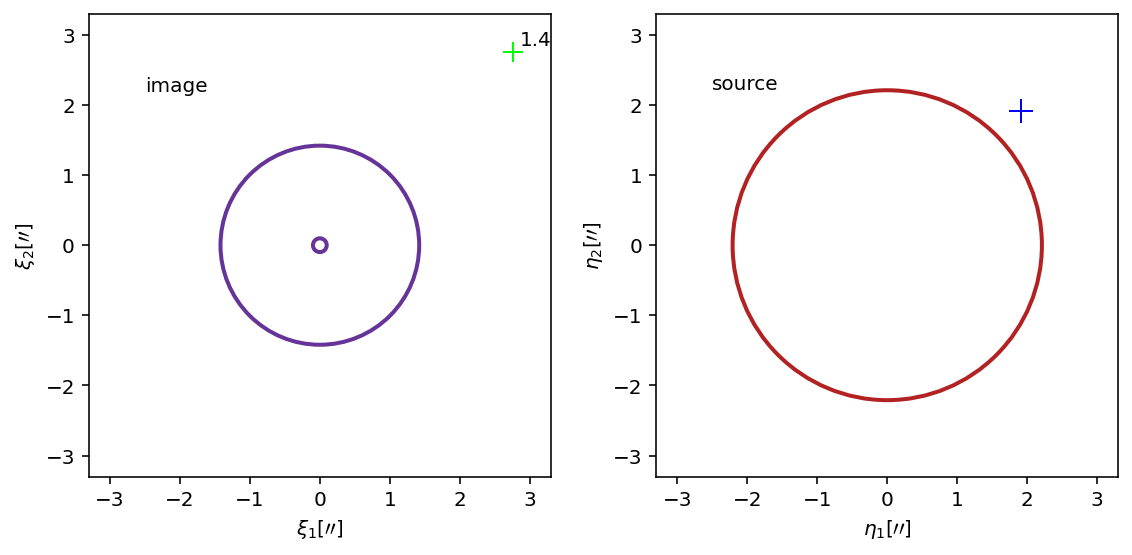

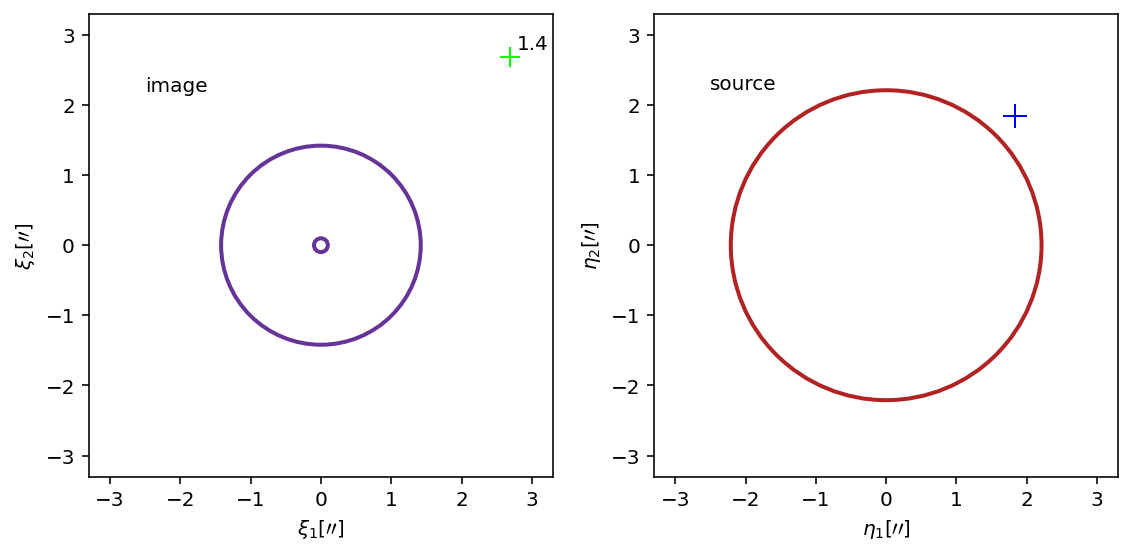

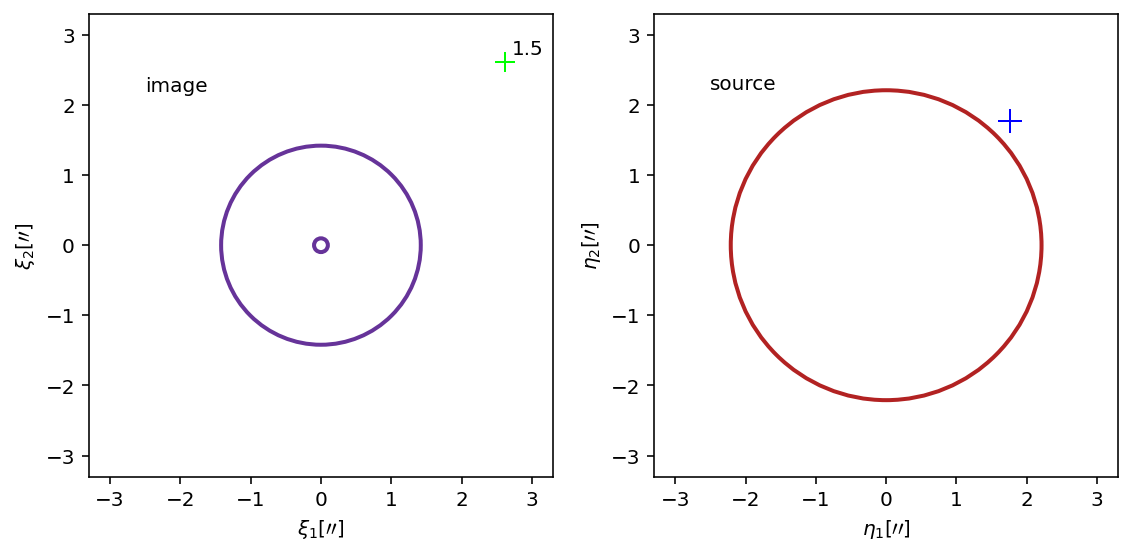

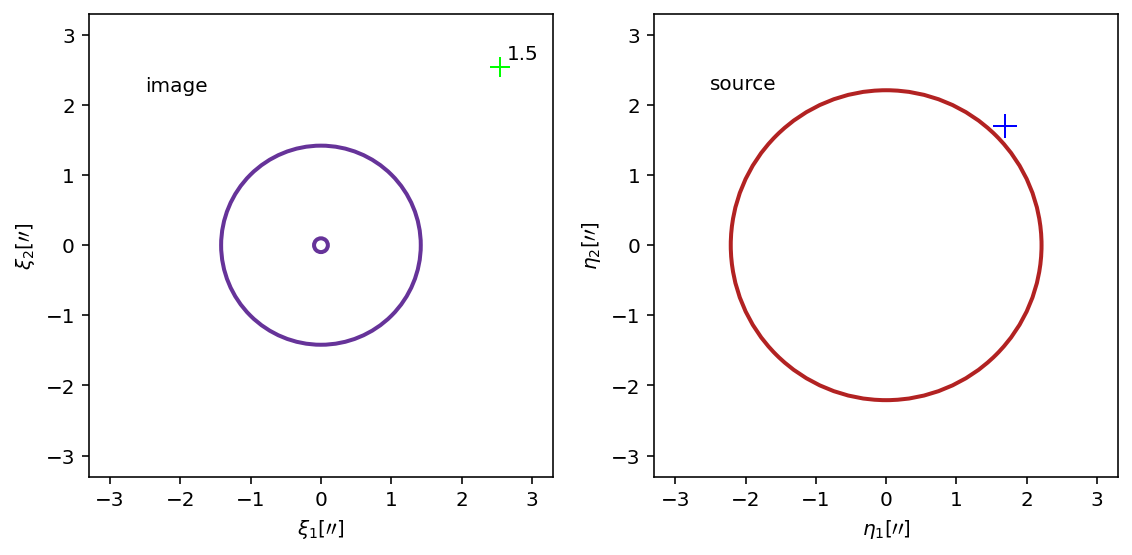

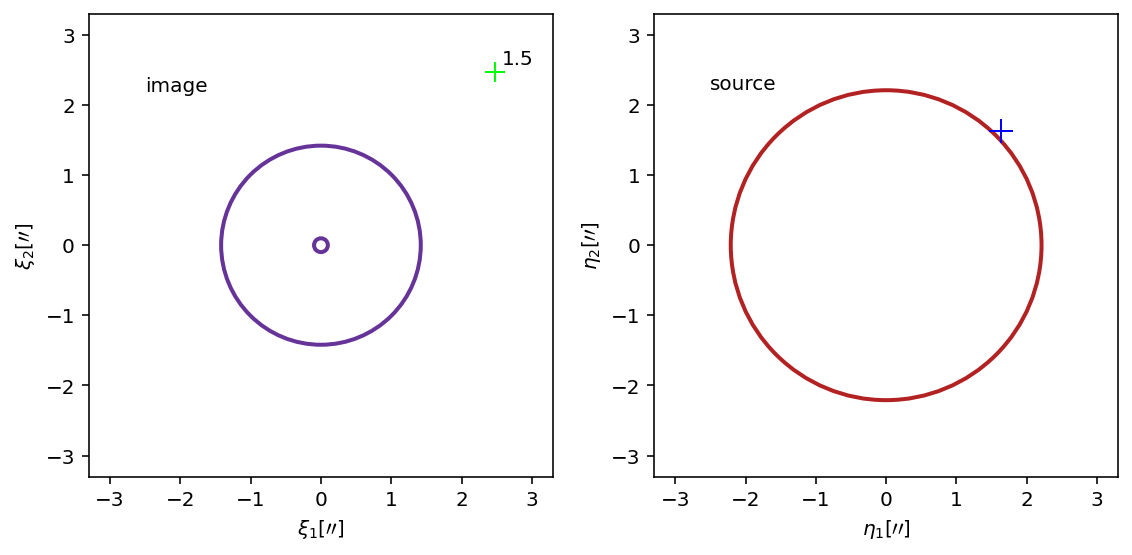

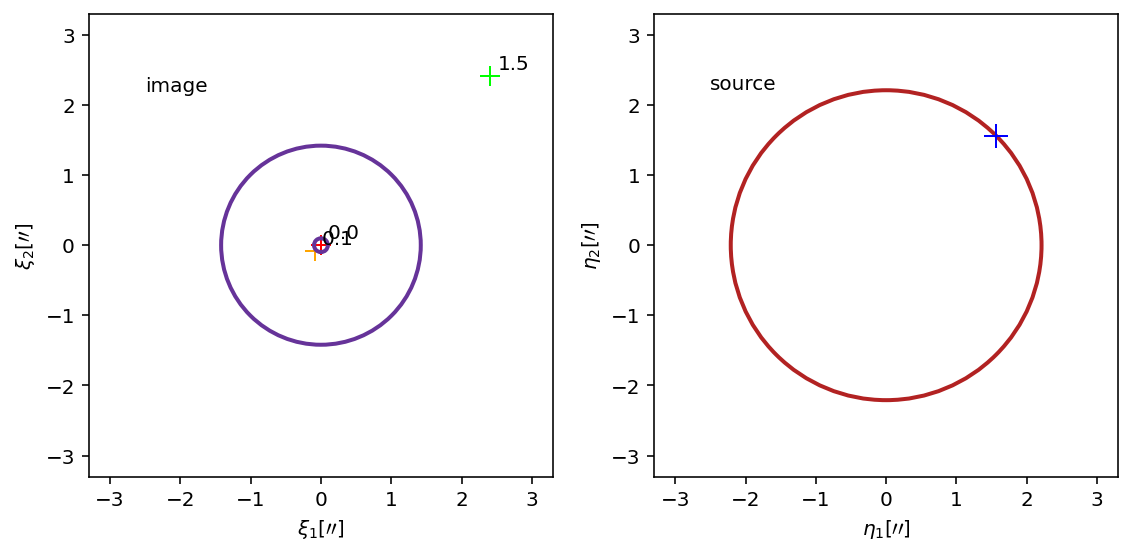

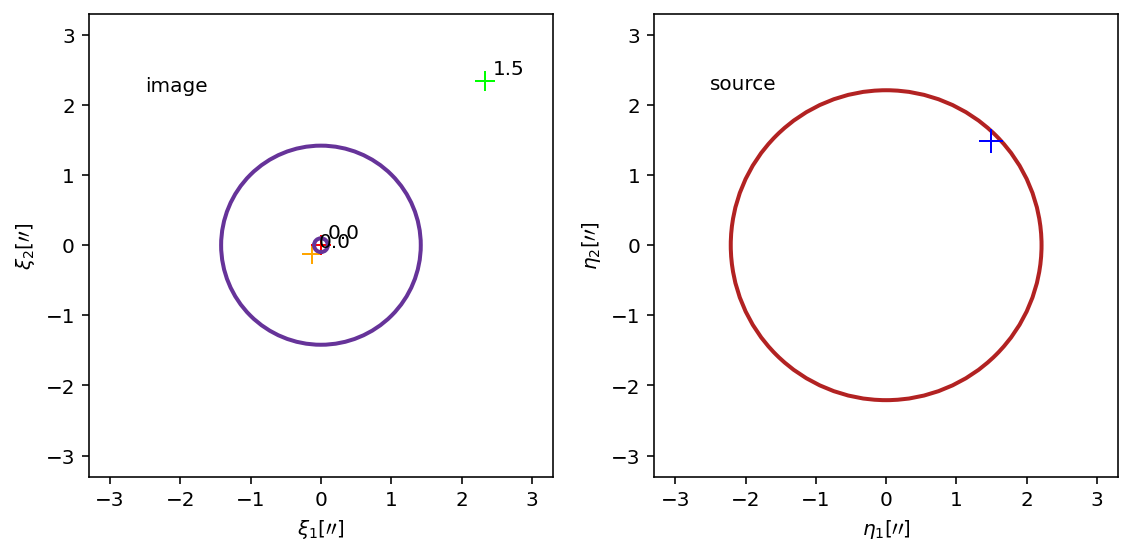

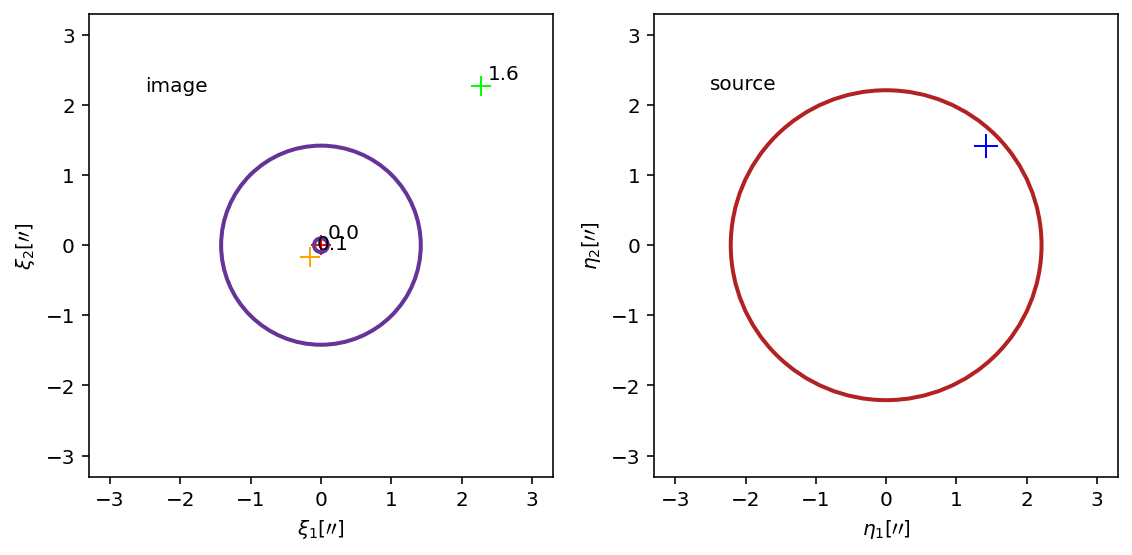

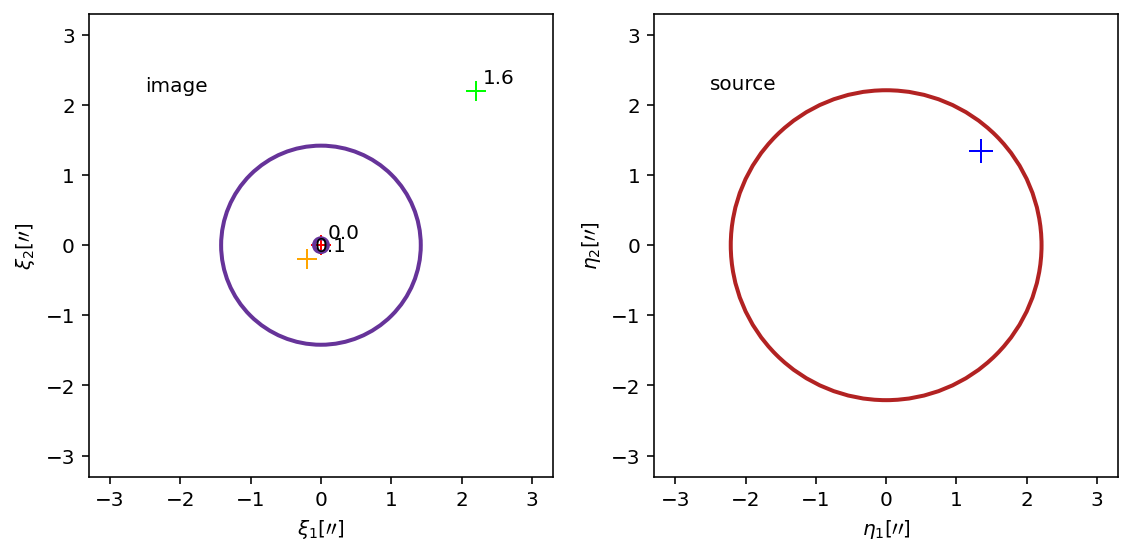

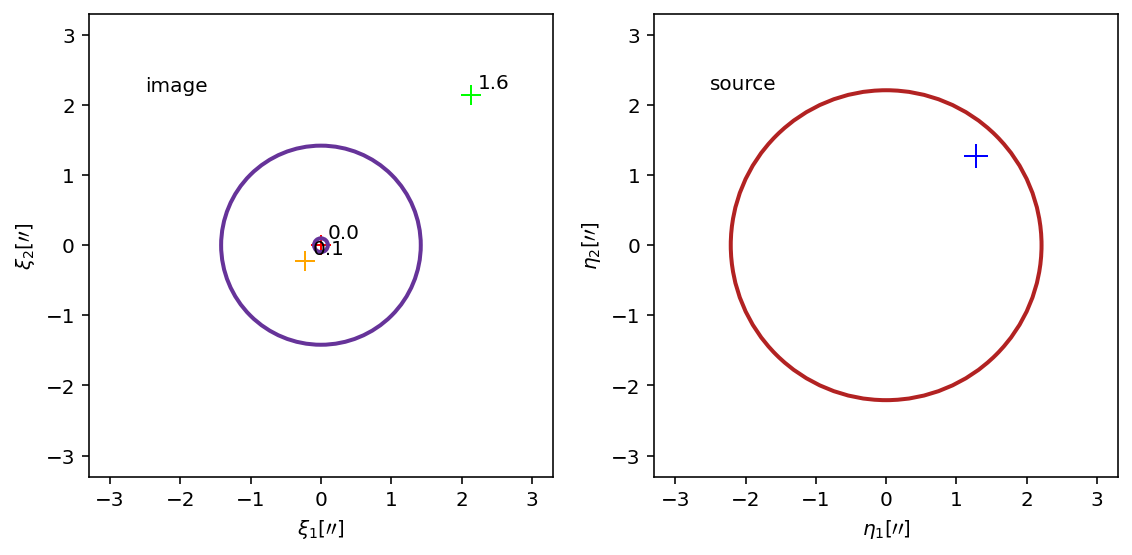

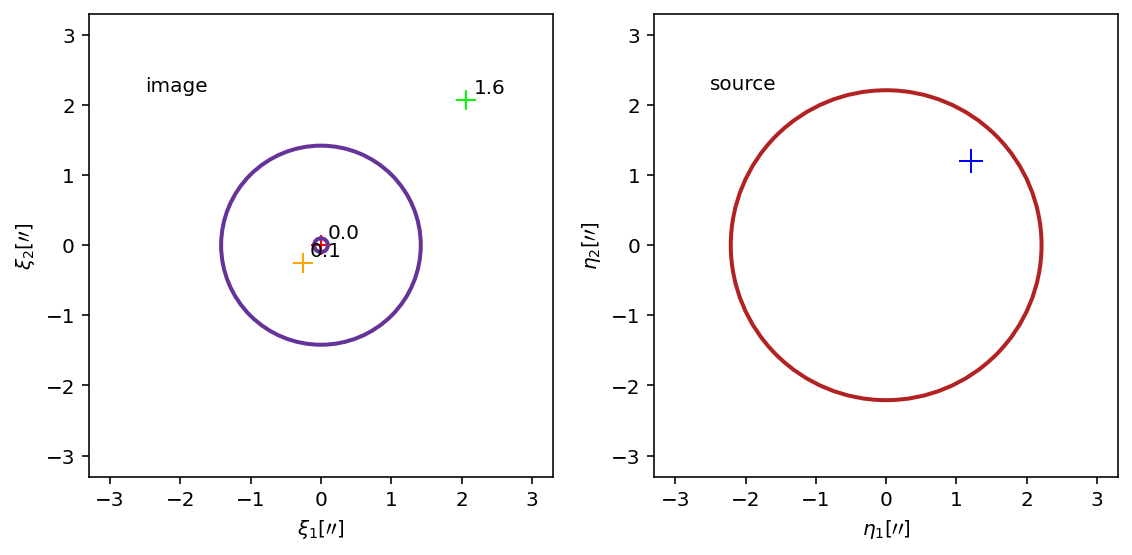

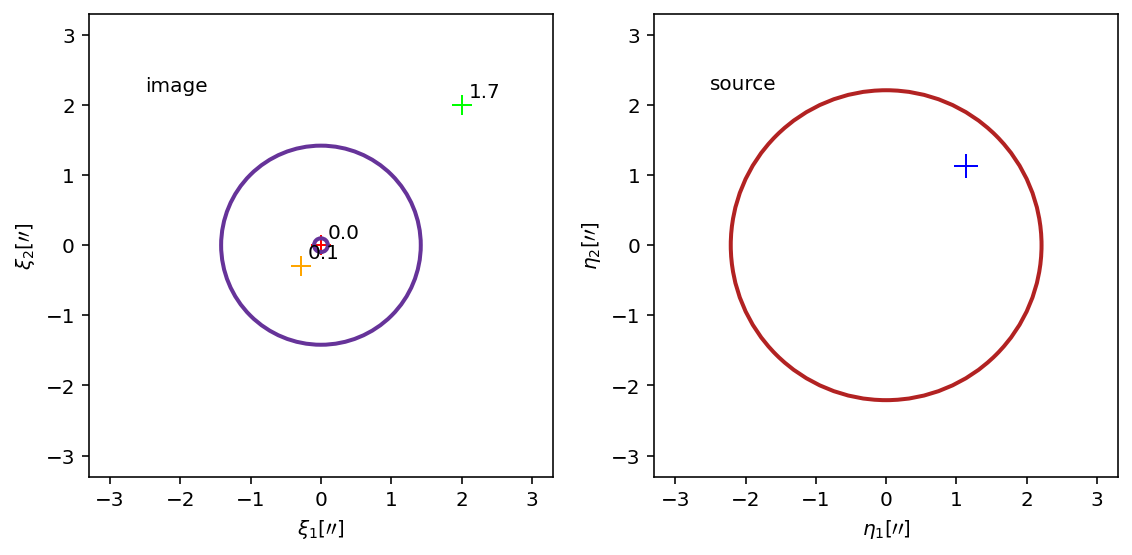

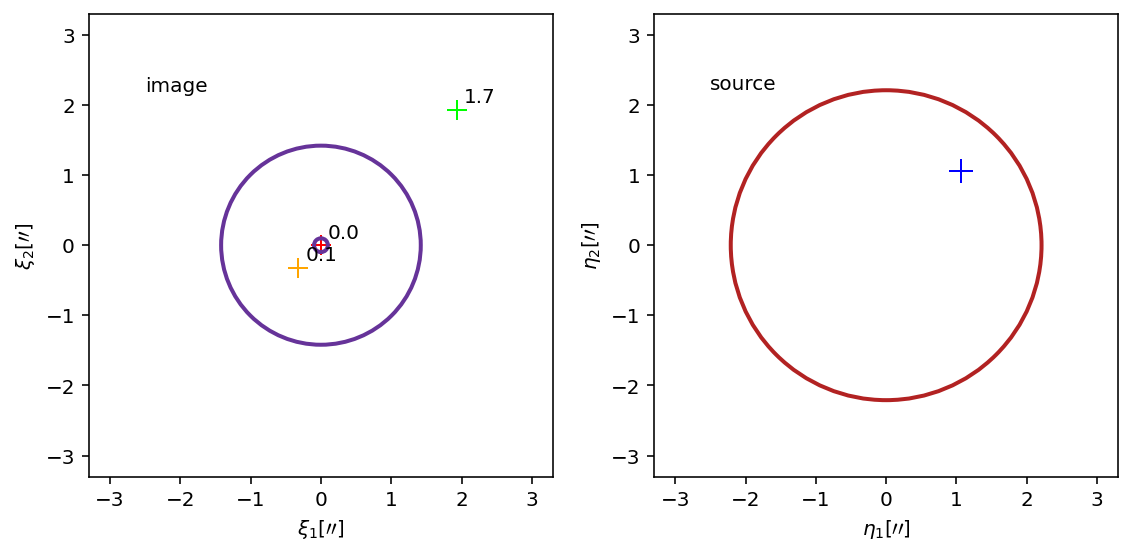

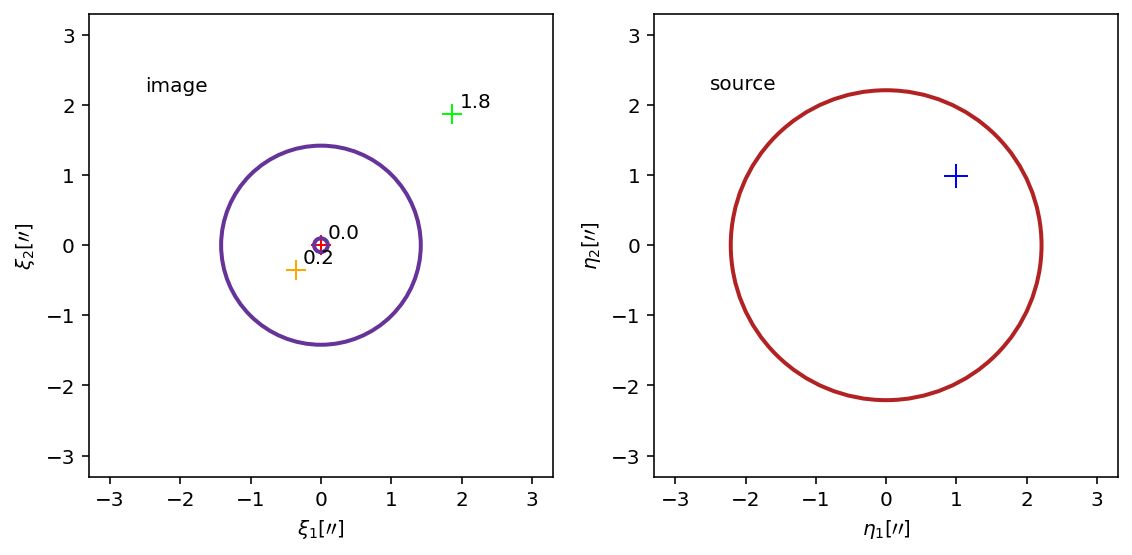

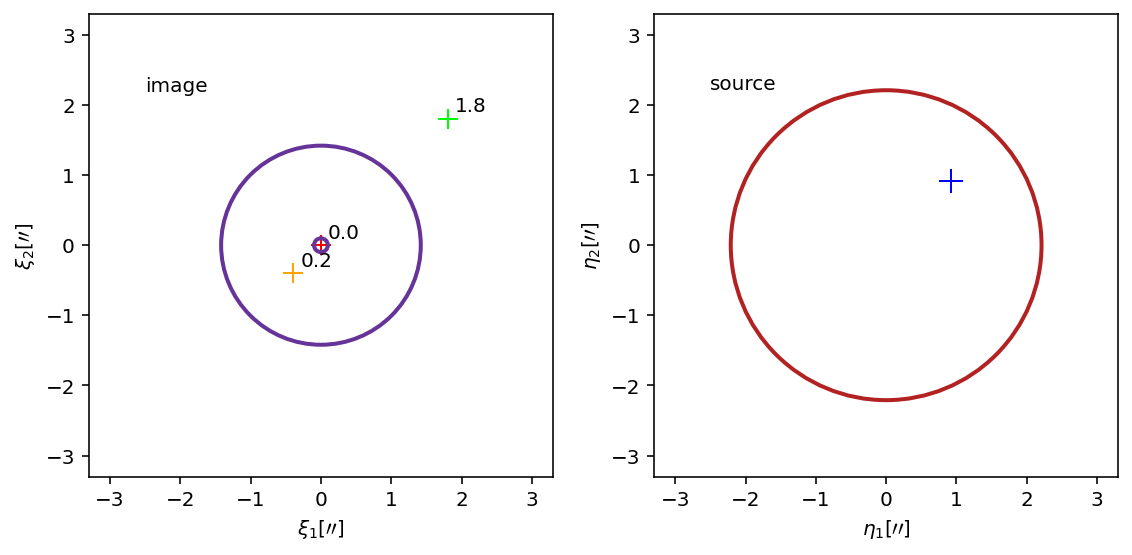

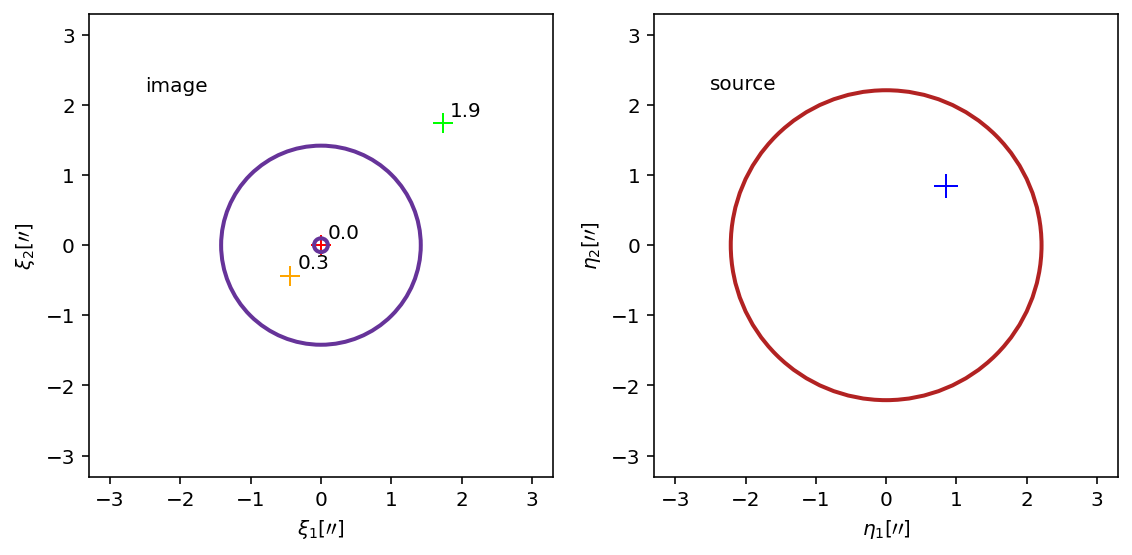

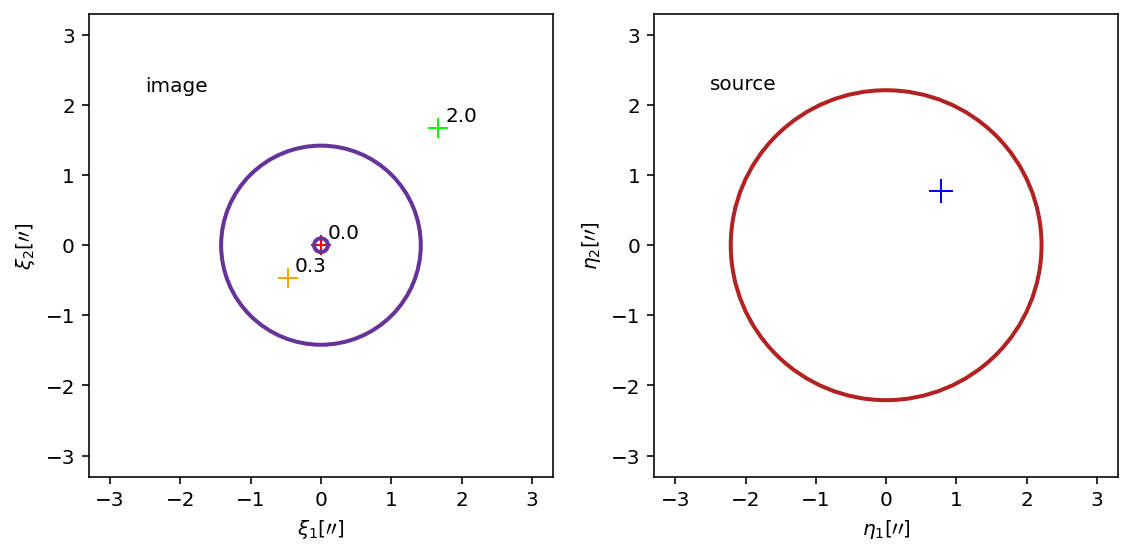

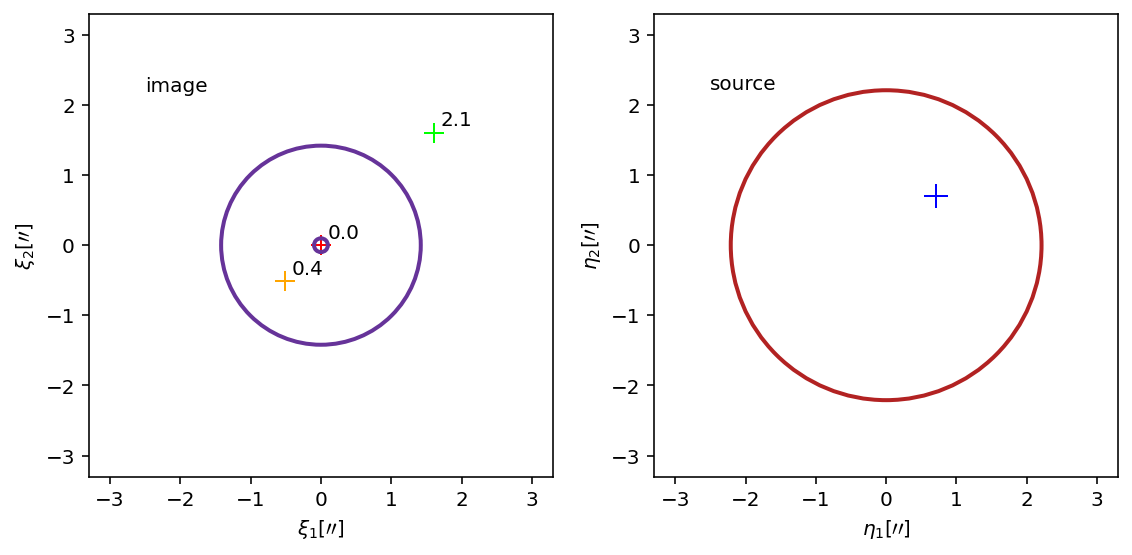

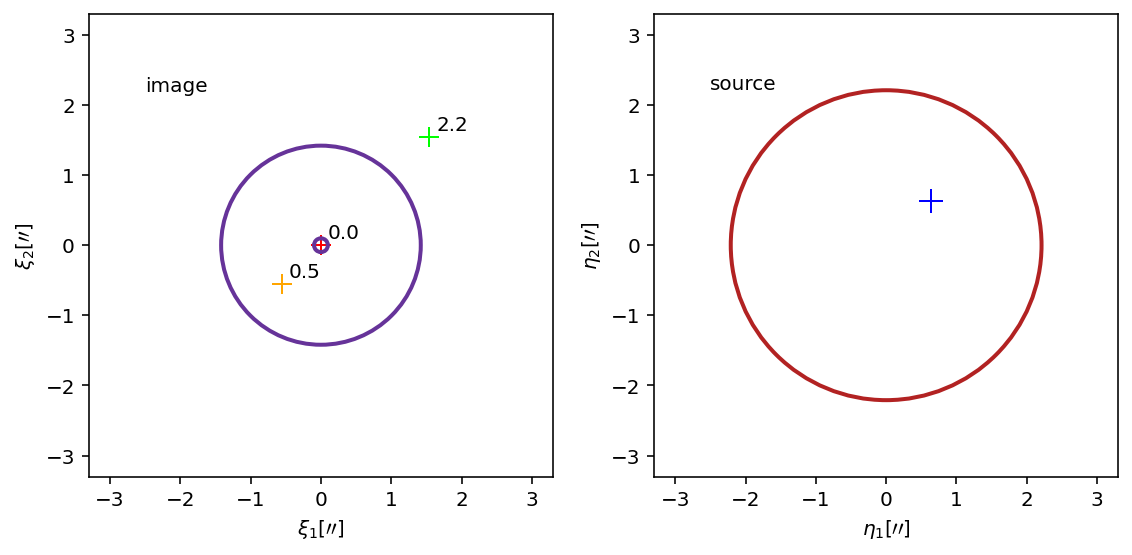

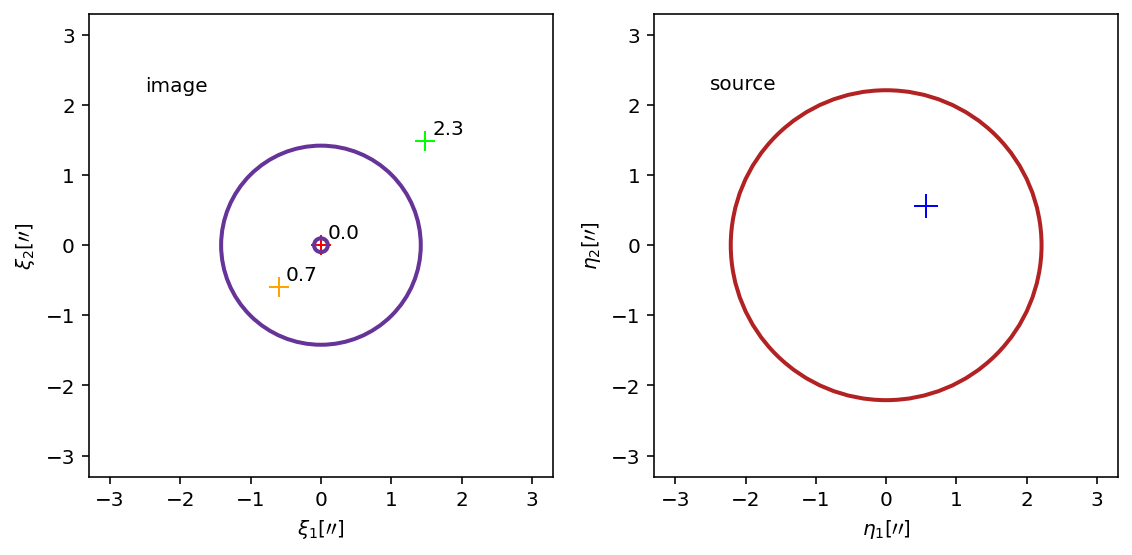

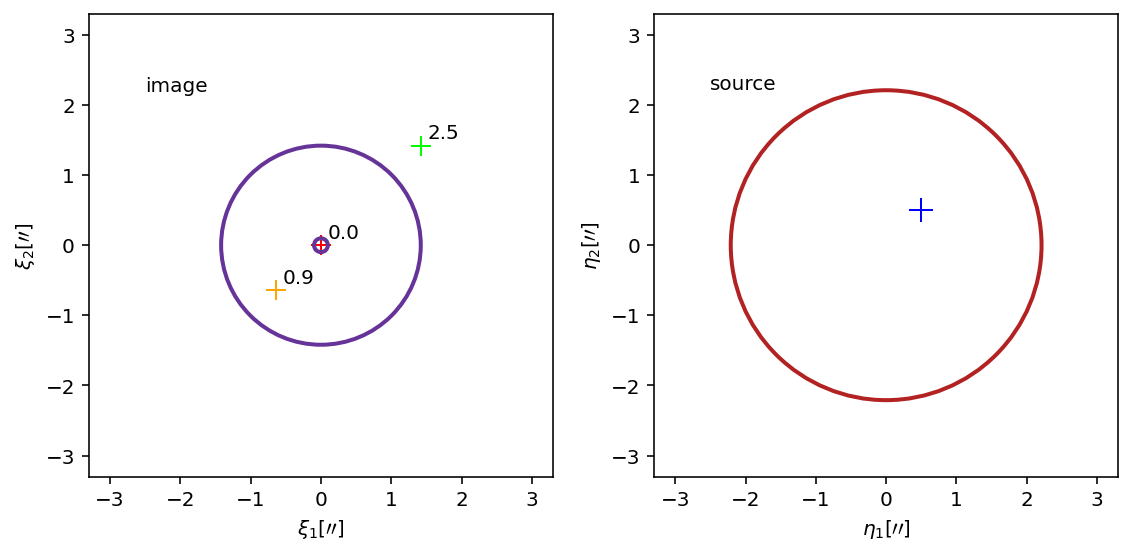

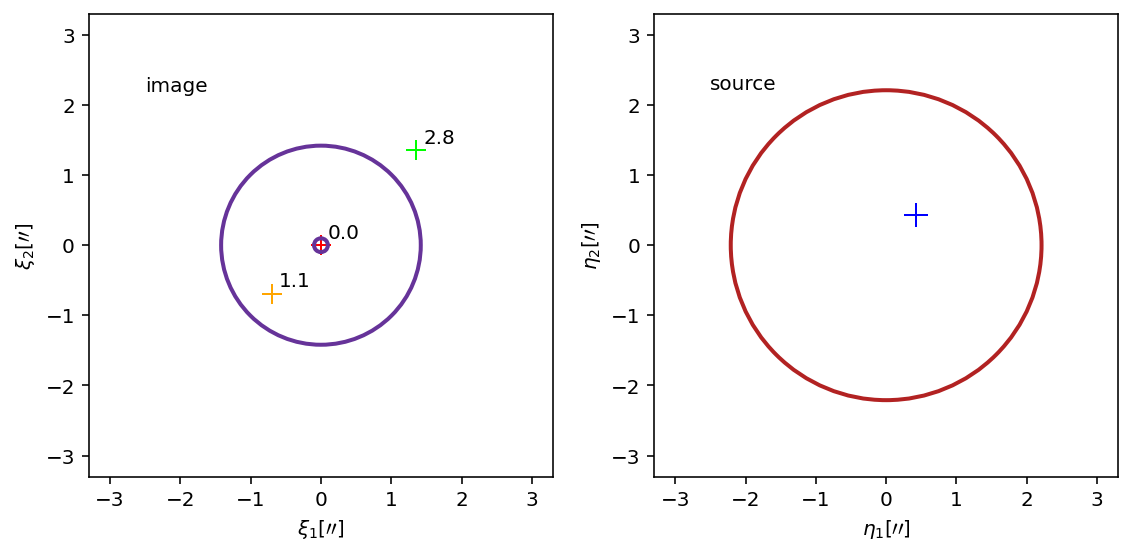

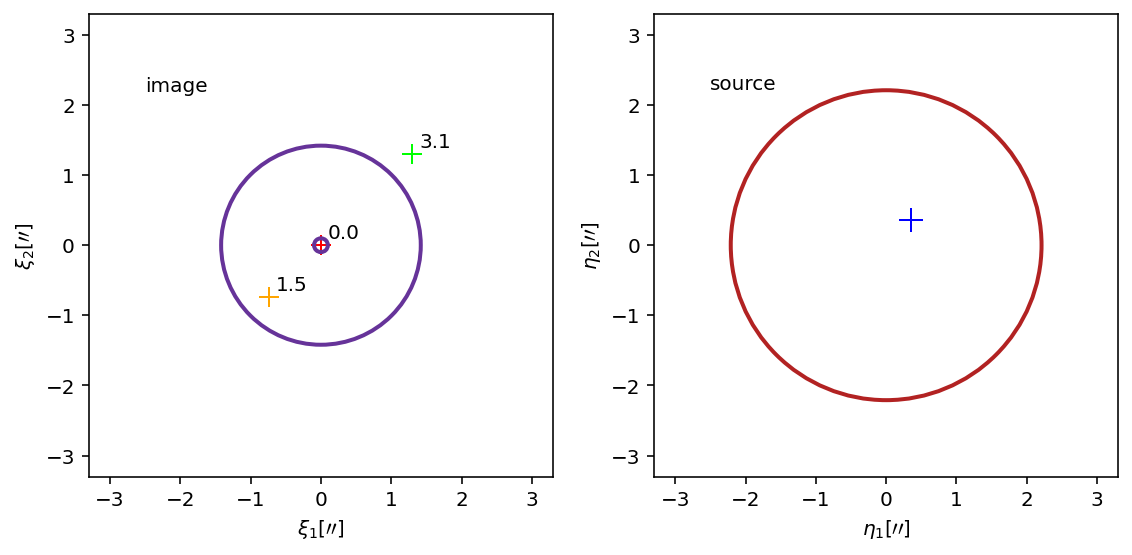

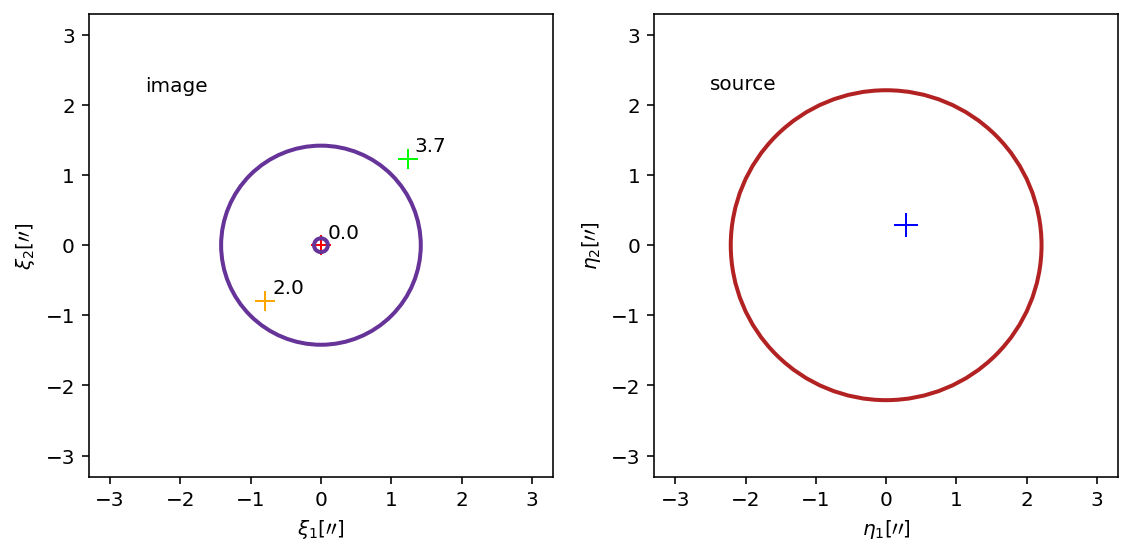

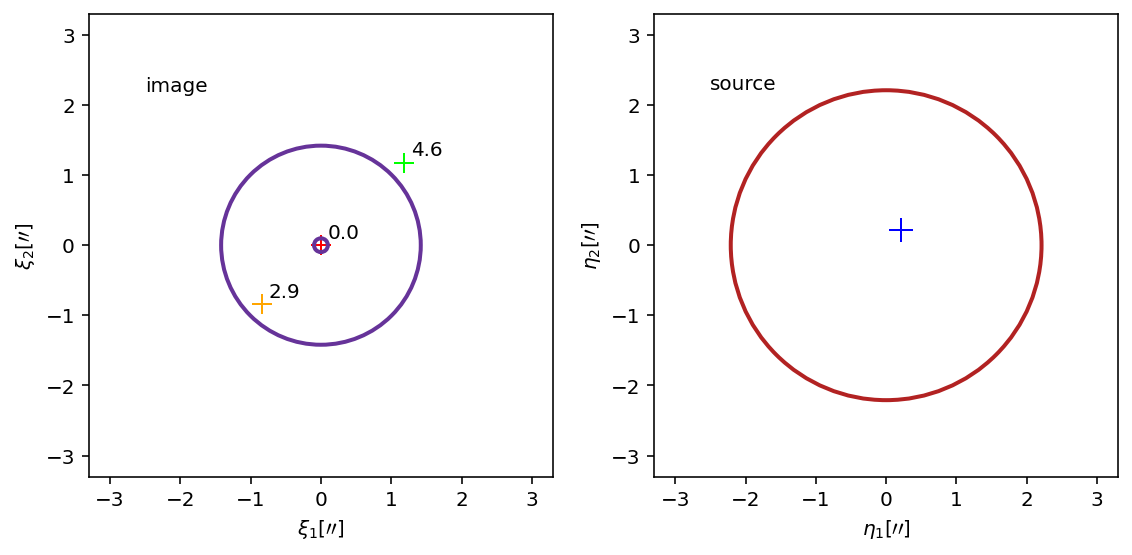

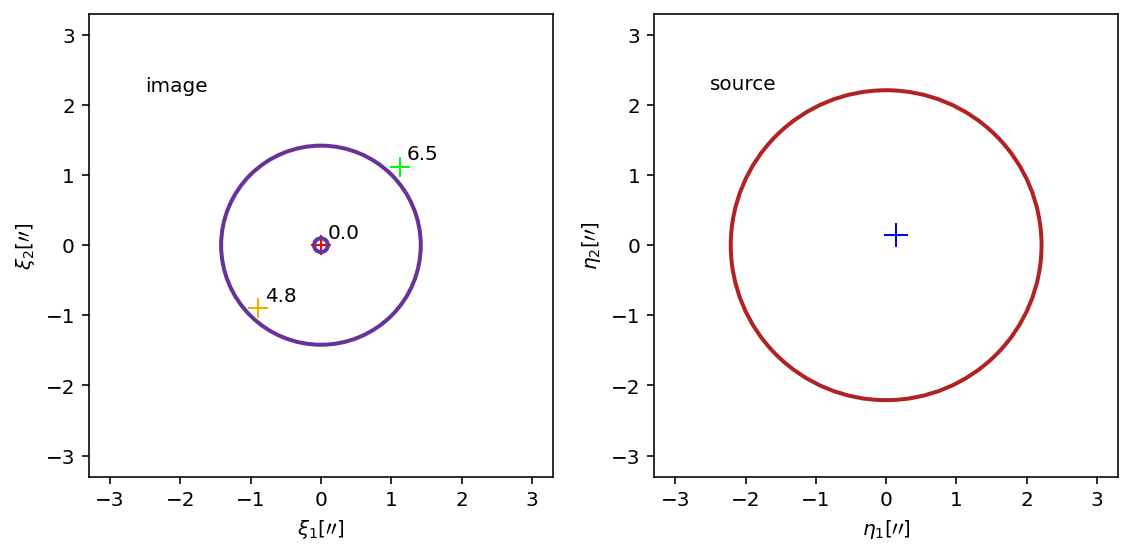

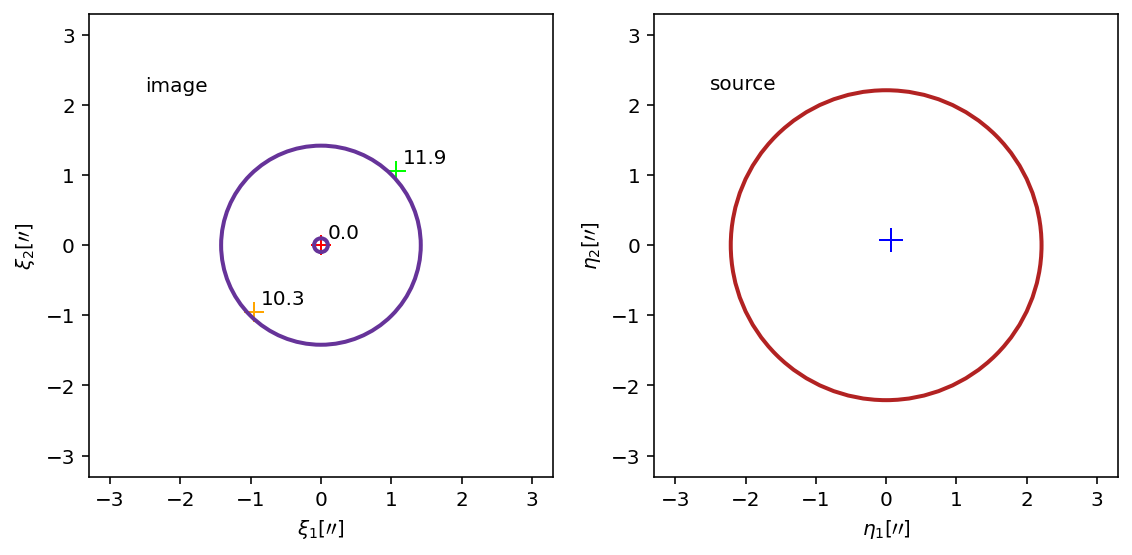

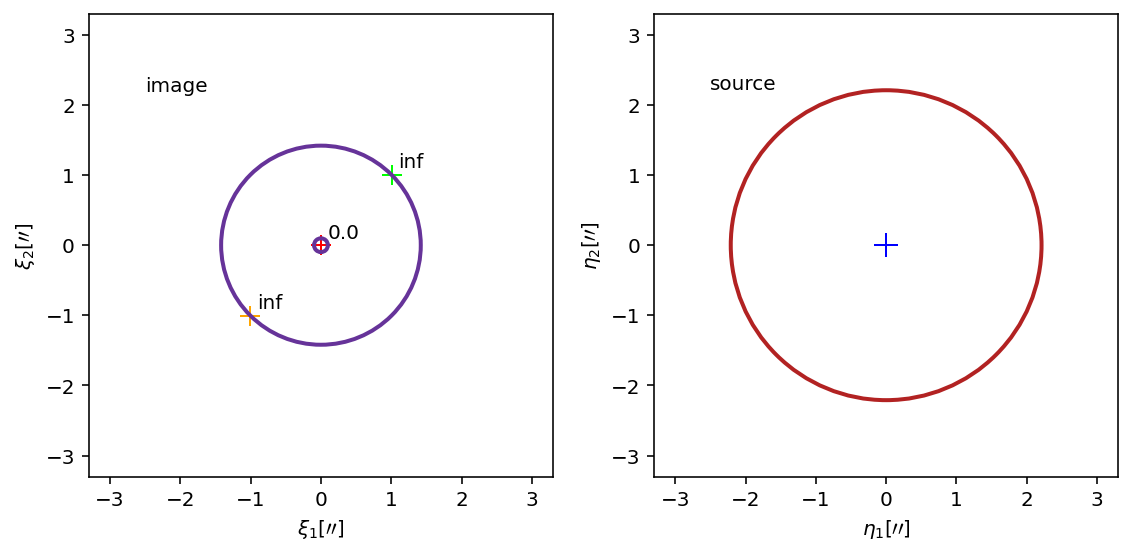

In [263]:
position = np.arange(0,28,1)[::-1]
for i in range(len(position)):
    fplot(position[i])
    

In [266]:
import imageio
images = []
for i in range(len(position)):
    if i == 0:
        filename = "./gif/pos_0.0.png"
    else:
        filename = "./gif/pos_{}.png".format(np.round(position[i]/10,3))
    images.append(imageio.imread(filename))
imageio.mimsave('./plots/movie.gif', images,duration=0.1)
